In [9]:
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd



# Load the Iris dataset
iris = datasets.load_iris()

X, y = iris.data, iris.target


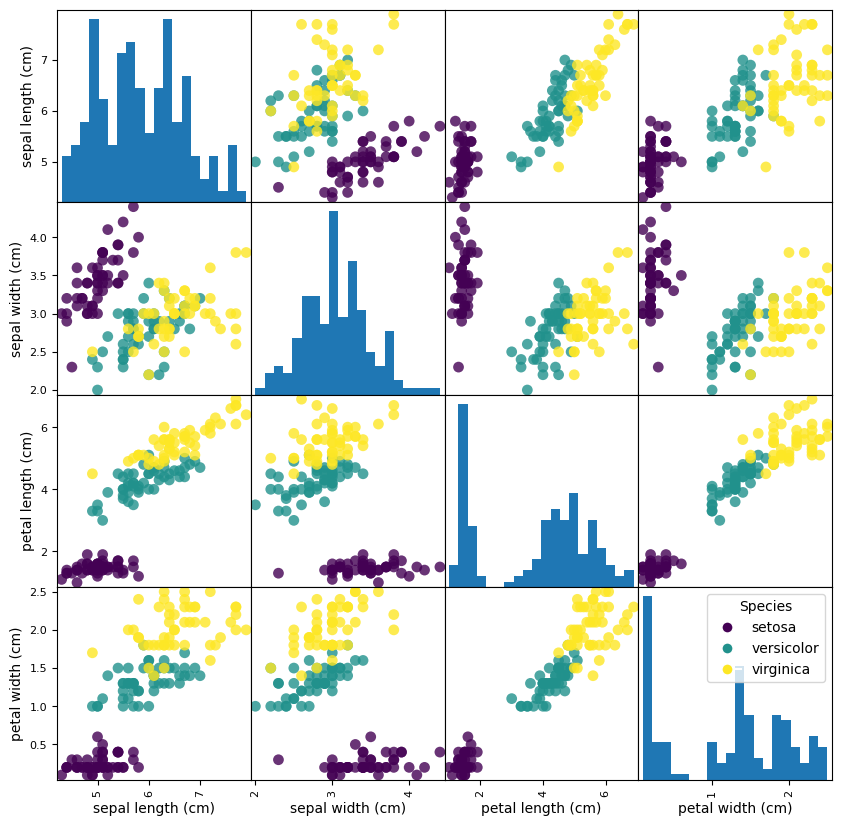

In [11]:
# Create a DataFrame from the Iris dataset
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Visualize the data using a scatter matrix (pairplot alternative)
scatter_matrix_fig = pd.plotting.scatter_matrix(iris_df.iloc[:, :4], figsize=(10, 10), c=y, marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)

# Add a legend for species colors
from matplotlib.lines import Line2D
cmap = plt.cm.viridis(np.linspace(0, 1, 3))
legend_elements = [Line2D([0], [0], marker='o', color='w', label=iris.target_names[i], markerfacecolor=cmap[i], markersize=8) for i in range(3)]
plt.legend(handles=legend_elements, loc='upper right', title='Species')
plt.show()



In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data into DMatrix format
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

# Set XGBoost parameters
params = {
    'objective': 'multi:softprob',
    'num_class': 3,
    'max_depth': 3,
    'eta': 0.3,
}


In [18]:
# Train the XGBoost model
num_rounds = 1
model = xgb.train(params, D_train, num_rounds)

# Make predictions on the test set
y_pred_prob = model.predict(D_test)
y_pred = y_pred_prob.argmax(axis=1)


In [38]:
from sklearn.model_selection import cross_val_score, KFold

# Convert the data into DMatrix format
D_all = xgb.DMatrix(X, label=y)

# Set XGBoost parameters
params = {
    'objective': 'multi:softprob',
    'num_class': 4,
    'max_depth': 3,
    'eta': 0.3,
    'alpha': 0.1,
    'lambda': 0.1
}
# Train the XGBoost model with cross-validation
num_rounds = 1
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = xgb.cv(params, D_all, num_rounds, folds=kfold, metrics='merror', as_pandas=True)

# Calculate mean and standard deviation of the cross-validation scores
mean_score = 1 - cv_scores['test-merror-mean'].iloc[-1]
std_score = cv_scores['test-merror-std'].iloc[-1]

print(f"Cross-validated accuracy: {mean_score * 100:.2f}% (+/- {std_score * 100:.2f}%)")


Cross-validated accuracy: 96.67% (+/- 2.11%)
